In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "https://finance.naver.com/sise/"

In [5]:
req = requests.get(url)
# html 정보에서 text정보만 추출
html = req.text
soup = BeautifulSoup(html, 'html.parser')

# my_stock 변수에 select 할 내용을 찾아서 넣어준다
my_stock = soup.select('.lst_pop')
for stock_name in my_stock:
    print(stock_name.text)


1.삼성전자60,900하락
2.한국조선해양92,000하락
3.SK하이닉스96,400상승
4.KODEX 배당성장13,175하락
5.카카오76,700하락
6.현대차190,000상승
7.NAVER248,000하락
8.대신증권우14,550하락
9.자이언트스텝25,250하락
10.샘표식품38,500하락



In [6]:
req = requests.get(url)
# html 정보에서 text정보만 추출
html = req.text
soup = BeautifulSoup(html, 'html.parser')

# my_stock 변수에 select 할 내용을 찾아서 넣어준다
world_stock = soup.select('.lst_major')
for stock_name in world_stock:
    print(stock_name.text)


다우산업33,706.74하락
 나스닥12,705.22하락
 홍콩H6,719.88상승
 상해종합3,258.08하락
 니케이22528,930.33하락



In [7]:
import urllib.request

# 웹사이트 정보 요청
page = urllib.request.urlopen(url)

# 해당 페이지는 cp949 방식의 인코딩 사용
html = page.read().decode('cp949')

soup = BeautifulSoup(html, 'html.parser')
soup.select('span.num')

[<span class="num _au_real_list">@code@</span>,
 <span class="num num2" id="KOSPI_now">2,492.69</span>,
 <span class="num num2" id="KOSDAQ_now">814.17</span>,
 <span class="num num2" id="KPI200_now">326.79</span>]

In [9]:
soup.select('span.num')[1]              # 찾는 값
soup.select('span.num')[1].string       # string 속성
float(soup.select('span.num')[1].string.replace(',', ''))    # float 변경

2492.69

In [10]:
# input으로 id = 'KOSPI_now' 처럼 지정
soup.find(id = 'KOSPI_now')
# string 속성을 가져와 원하는 데이터까지 도달
soup.find(id = 'KOSPI_now').string

'2,492.69'

In [15]:
# 코스피 등락률 크롤링
#soup.find(id = 'KOSPI_change')
#soup.find(id = 'KOSPI_change').contents
#soup.find(id = 'KOSPI_change').contents[2]
#soup.find(id = 'KOSPI_change').contents[2].split()
soup.find(id = 'KOSPI_change').contents[3].string

'상승'

In [29]:
def NS_users_crawler(codes, page):
# User-Agent 설정
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'}
    result_df = pd.DataFrame([])
    n_ = 0
    for page in range(1, page):
        n_ += 1
        if (n_ % 10 == 0):
            print('================== Page ' + str(page) + ' is done ==================')
        url = "https://finance.naver.com/item/board.naver?code=%s&page=%s" % (codes, str(page))
# html → parsing
        html = requests.get(url, headers=headers).content
# 한글 깨짐 방지 decode
        soup = BeautifulSoup(html.decode('euc-kr', 'replace'), 'html.parser')
        table = soup.find('table', {'class': 'type2'})
        tb = table.select('tbody > tr')
        for i in range(2, len(tb)):
            if len(tb[i].select('td > span')) > 0:
                date = tb[i].select('td > span')[0].text
                title = tb[i].select('td.title > a')[0]['title']
                views = tb[i].select('td > span')[1].text
                pos = tb[i].select('td > strong')[0].text
                neg = tb[i].select('td > strong')[1].text
                table = pd.DataFrame({'날짜': [date], '제목': [title], '조회': [views], '공감': [pos], '비공감': [neg]})
                result_df = result_df.append(table)
    return result_df

In [30]:
data = NS_users_crawler("005930", 3)
data.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_8648\2787053089.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\USER\AppData\Local\Temp\ipykernel_8648\2787053089.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\USER\AppData\Local\Temp\ipykernel_8648\2787053089.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\USER\AppData\Local\Temp\ipykernel_8648\2787053089.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\USER\AppData\Local\Temp\ipykernel_8648\2787

,날짜,제목,조회,공감,비공감
0,2022.08.21 14:51,EUR / JPY 하락 전환 전망 !!!!!!!!,2,0,0
0,2022.08.21 14:49,이준석 2차 성접대,2,0,0
0,2022.08.21 14:49,병사들,4,2,1
0,2022.08.21 14:48,USD/CNY 신고가 = 대폭락 심화될 것 !!!!!!!!,9,1,0
0,2022.08.21 14:47,숨어서 지켜보는 보수 꼴통이 많군요. ㅋㅋ,8,3,0
0,2022.08.21 14:46,형이다!!!,8,2,0
0,2022.08.21 14:44,주식을 사랑에 비유해서 롱런하는 방법?,9,0,0
0,2022.08.21 14:42,난 또 좌삐리들이 돼지 돼지해서 정수기인줄 알았네,9,0,3
0,2022.08.21 14:41,전OPEC총장 돌연사 전 일본총리 암살,16,1,1
0,2022.08.21 14:40,2찍들 나불거리는거 보니 아직 정신못차렸네,19,3,0


In [35]:
import pandas as pd
import requests
code = '005930'
URL = f"https://finance.naver.com/item/main.nhn?code={code}"
r = requests.get(URL)
df = pd.read_html(r.text)[3]
df.set_index(df.columns[0],inplace=True)
df.index.rename('주요재무정보', inplace=True)
df.columns = df.columns.droplevel(2)
annual_date = pd.DataFrame(df).xs('최근 연간 실적',axis=1)
quater_date = pd.DataFrame(df).xs('최근 분기 실적',axis=1)

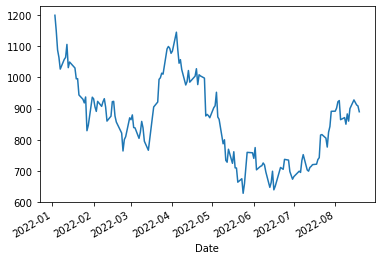

In [1]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')

# 개별 종목 가격 데이터 가져오기
#df = fdr.DataReader('종목코드', '시작일자'. '종료일자')

# 한국주식 (삼성전자)
#df = fdr.DataReader('323410', '2022')
#df
#df['Open'].plot();

# 미국주식 (APPLE) # df['Close'].plot();
df = fdr.DataReader('TSLA', '2022')
#df
df['Close'].plot();

# ETF 데이터 가져오기 # 미국(ETF/US), 일본(ETF/JP)
#df_etf = fdr.StockListing('ETF/KR')
#df_etf

# KODEX 200선물인버스2X 사례
#df_inver = fdr.DataReader('252670')
#df_inver
